# K-Means on college data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
df = pd.read_csv('College_Data.csv')
df.shape

(777, 19)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [18]:
df.describe

<bound method NDFrame.describe of                          Unnamed: 0 Private   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University     Yes   1660    1232     721         23   
1                Adelphi University     Yes   2186    1924     512         16   
2                    Adrian College     Yes   1428    1097     336         22   
3               Agnes Scott College     Yes    417     349     137         60   
4         Alaska Pacific University     Yes    193     146      55         16   
..                              ...     ...    ...     ...     ...        ...   
772         Worcester State College      No   2197    1515     543          4   
773               Xavier University     Yes   1959    1805     695         24   
774  Xavier University of Louisiana     Yes   2097    1915     695         34   
775                 Yale University     Yes  10705    2453    1317         95   
776    York College of Pennsylvania     Yes   2989    1855     691         

In [19]:
dup = df.duplicated().sum()
print("Duplicates : ",dup)

Duplicates :  0


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [22]:
df.dtypes

Unnamed: 0      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [23]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [24]:
x = df.iloc[:,[3,4]].values

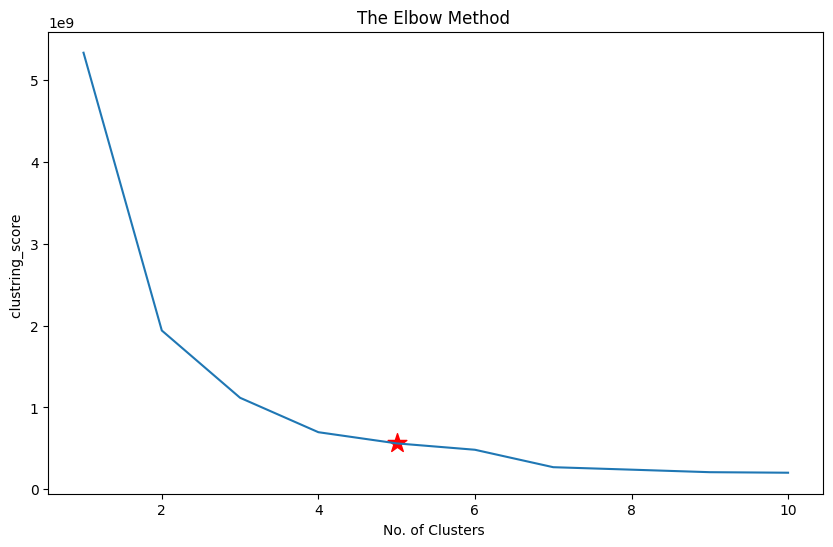

In [25]:
clustring_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='random' , random_state=42)
    kmeans.fit(x)
    clustring_score.append(kmeans.inertia_) # inertia_ = sum of squared distance of sample to their closest cluster cente 

plt.figure(figsize=(10,6))
plt.plot(range(1,11) , clustring_score)
plt.scatter(5 , clustring_score[4] , s=200 , c='red' , marker="*")
plt.title("The Elbow Method ")
plt.xlabel("No. of Clusters ")
plt.ylabel("clustring_score ")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=5 , random_state=42)

# Compute KMeans Clustring
kmeans.fit(x) 

# Compute cluster centers and predict cluster index for each sample 
pred = kmeans.predict(x)
pred

array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4,
       0, 3, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 1, 0, 4, 2, 0,
       2, 0, 0, 1, 4, 0, 4, 0, 2, 0, 0, 0, 4, 4, 2, 2, 0, 2, 2, 0, 2, 4,
       0, 0, 2, 4, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 4, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 4, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 4, 0,
       1, 4, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 2, 2, 0, 4, 2, 0, 0, 0, 4, 0,
       0, 0, 2, 2, 0, 1, 0, 4, 4, 2, 0, 0, 4, 0, 0, 2, 2, 0, 0, 0, 4, 4,
       0, 4, 4, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 4, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 3, 0, 4, 1, 1, 1, 0, 2, 0, 2, 4, 0,
       0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,

In [27]:
df['Cluster'] = pd.DataFrame(pred , columns=['cluster'])
print("Number of datapoints in each cluster= \n" , df['Cluster'].value_counts())
df

Number of datapoints in each cluster= 
 Cluster
0    402
2    208
4     95
1     55
3     17
Name: count, dtype: int64


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,2
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,2
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,2
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,2


Text(0.5, 1.0, 'Customer Clusters')

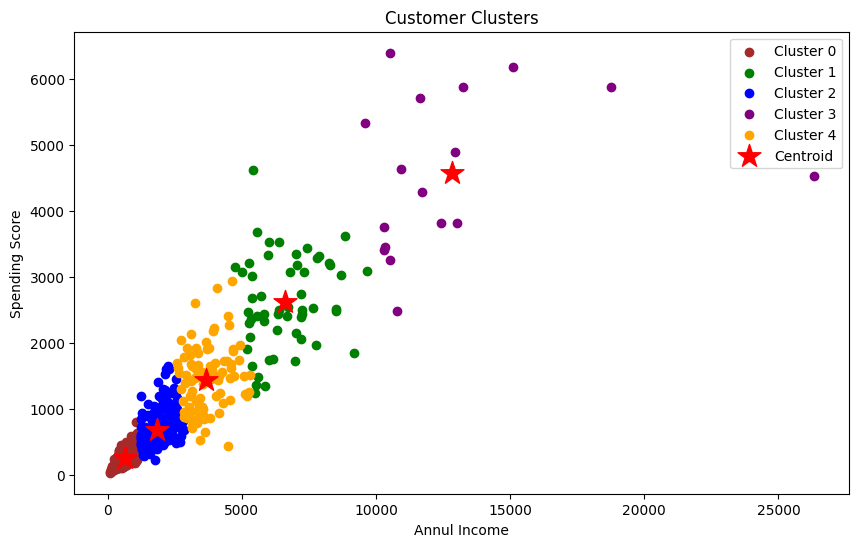

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x[pred == 0 ,0] , x[pred == 0 ,1] , c='brown' , label='Cluster 0')
plt.scatter(x[pred == 1 ,0] , x[pred == 1 ,1] , c='green' , label='Cluster 1')
plt.scatter(x[pred == 2 ,0] , x[pred == 2 ,1] , c='blue' , label='Cluster 2')
plt.scatter(x[pred == 3 ,0] , x[pred == 3 ,1] , c='purple' , label='Cluster 3')
plt.scatter(x[pred == 4 ,0] , x[pred == 4 ,1] , c='orange' , label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1],s=300 , c='red' , label='Centroid' , marker='*')

plt.xlabel('Annul Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')